In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import random
import warnings
from time import time
warnings.filterwarnings('ignore')

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import random
import warnings
from time import time
warnings.filterwarnings('ignore')

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import random
import warnings
from time import time
warnings.filterwarnings('ignore')

In [112]:
def create_graph():
    
    x=[0.09,0.16,0.84,0.70]
    y=[0.17,0.52,0.92,0.16]
    
    n=len(x)
    
    l=np.zeros((n,n))
    
#     print(l)
    
    for i in range(n):
        for j in range(n):
            x1=x[i]
            y1=y[i]
            x2=x[j]
            y2=y[j]
            
            ecd_dist= np.sqrt( (x1-x2)**2 + (y1-y2)**2 )
            
            l[i,j]=ecd_dist
            
            
    print(l)
    
    return l

In [113]:
graph=create_graph()
type(graph)

[[0.         0.35693137 1.06066017 0.61008196]
 [0.35693137 0.         0.78892332 0.64899923]
 [1.06066017 0.78892332 0.         0.77278716]
 [0.61008196 0.64899923 0.77278716 0.        ]]


numpy.ndarray

In [114]:
## rolette_wheel function to choose the best node based on probability

In [115]:

def rolette_wheel(p):

    cumsum = np.cumsum(p)

    r = random.random()

    next_node = np.where(r <= cumsum)

    next_node = next_node[0][0]

    return next_node

In [116]:
## create colony function

In [117]:
def create_colony(graph, ant_no, tau, eta, alpha, beta):
    n = len(graph)
    
#     print(n)

    colony = []

    for i in range(ant_no):
        tour = []
        initial_node = random.randint(0, n - 1)  # select a random node

        tour.append(initial_node)

        P_allNodes = tau ** alpha * eta ** beta

        for j in range(1, n):  # choose the rest of nodes

            currentNode = tour[-1]

            p = P_allNodes[initial_node][:]

            p[tour[-1]] = 0  # assign 0 to already visited node

            P = p / np.sum(p)

            next_node = rolette_wheel(P)
            
            tour.append(next_node)

        tour.append(tour[0])

        colony.append(tour)

    return colony

In [118]:
## to calc the fitness of all the ant ( i.e. cost/ distance)

In [119]:
def fitness(tour, graph):
    fitness = 0

    for i in range(len(tour) - 1):
        current_node = tour[i]
        next_node = tour[i + 1]

        fitness = fitness + graph[current_node][next_node]

    return fitness

In [120]:
## function to update_phromone  

In [121]:
def update_phromone(tau, colony, antno, graph):

    for i in range(antno):
        for j in range(len(colony[i]) - 1):
            current_node = colony[i][j]
            next_node = colony[i][j + 1]

            tau[current_node][next_node] = tau[current_node][next_node] + 1 / fitness(colony[i], graph)
            tau[next_node][current_node] = tau[next_node][current_node] + 1 / fitness(colony[i], graph)

            # print(tau)
    return tau


In [122]:
## main ACO algo.

In [123]:
def aco_algo(graph, max_iter):
    
    max_iter = max_iter
    ant_no = 10
    n = len(graph)
    
    all_best_tour=[]
    
    tau0 = 10 * 1 / (len(graph) * np.mean(graph))  # initial phromone

    tau = tau0 * np.ones((n, n))  # phromone matx

    eta = 1 / graph  # desirability of each edge

    rho = 0.05  # evporation rate
    alpha = 1  # phromone exponential parameters
    beta = 1  # desirability exponential parameter

    best_fitness = np.inf

    
    # main loop for ACO
    for i in range(max_iter):

        all_fitness = []

        colony = create_colony(graph, ant_no, tau, eta, alpha, beta)

        for j in range(ant_no):
            all_fitness.append(fitness(colony[j], graph))


        min_tour = colony[np.argmin(all_fitness)]
        
        min_fitness = all_fitness[np.argmin(all_fitness)]

        if min_fitness < best_fitness:
            all_best_tour=[]
        
        if min_fitness <= best_fitness:
            best_fitness = min_fitness
            best_tour = colony[np.argmin(all_fitness)]
            best_tour = np.array(best_tour)+1
            
            
        if list(best_tour) not in all_best_tour:
            all_best_tour.append(list(best_tour))
        

        tau = update_phromone(tau, colony, ant_no,graph)

        tau = (1 - rho) * tau

        print(f'Iteration = {i + 1}, shortest_path ={best_fitness} , best_tour={best_tour}')
        
    print(f'\nShortest Path = {best_fitness}')
    
    print("All best tour = ",*all_best_tour)
    

In [124]:
graph

array([[0.        , 0.35693137, 1.06066017, 0.61008196],
       [0.35693137, 0.        , 0.78892332, 0.64899923],
       [1.06066017, 0.78892332, 0.        , 0.77278716],
       [0.61008196, 0.64899923, 0.77278716, 0.        ]])

In [125]:
start=time()
aco_algo(graph,10)
end=time()
print("\nTotal Time",end-start)

Iteration = 1, shortest_path =2.5287238080453878 , best_tour=[1 2 3 4 1]
Iteration = 2, shortest_path =2.5287238080453873 , best_tour=[3 2 1 4 3]
Iteration = 3, shortest_path =2.5287238080453873 , best_tour=[3 2 1 4 3]
Iteration = 4, shortest_path =2.5287238080453873 , best_tour=[4 1 2 3 4]
Iteration = 5, shortest_path =2.5287238080453873 , best_tour=[4 1 2 3 4]
Iteration = 6, shortest_path =2.5287238080453873 , best_tour=[4 1 2 3 4]
Iteration = 7, shortest_path =2.5287238080453873 , best_tour=[3 2 1 4 3]
Iteration = 8, shortest_path =2.5287238080453873 , best_tour=[1 4 3 2 1]
Iteration = 9, shortest_path =2.5287238080453873 , best_tour=[4 1 2 3 4]
Iteration = 10, shortest_path =2.5287238080453873 , best_tour=[4 1 2 3 4]

Shortest Path = 2.5287238080453873
All best tour =  [3, 2, 1, 4, 3] [4, 1, 2, 3, 4] [1, 4, 3, 2, 1]

Total Time 0.029138565063476562


## Travelling Salesman Problem

In [109]:
## kaggle  TSA Problem 
#  https://www.kaggle.com/tanmoyie/traveling-salesman-problem-to-optimize-travel

In [132]:
l = [[  0, 290, 250,  230,  190,  334, 365,   40], # Dhaka 1
    [290,   0, 337,  453,  396,  560, 581,  244], # Syhlet 2
    [250, 337,   0,  495,  396,  540, 120,  240], # Chittagonj 3
    [230, 453, 495,    0,  360,  150, 595,  242], # Rajshahi 4
    [190, 396, 396,  360,    0,  356, 496,  253], # Jossore 5
    [334, 560, 540,  150,  356,    0, 674,  275], # Dinajpur 6
    [365, 581, 120,  595,  496,  674,   0,  397], # Coxsbazar 7
    [40,  244, 240,  242,  253,  275, 397,    0]] # Narsingdi 8
    


l=np.array(l)



In [133]:
start=time()
aco_algo(l,1000)  # aco_algo(graph, max_iteration) 
end=time()
print("\nTotal Time",end-start)

Iteration = 1, shortest_path =2717 , best_tour=[2 5 1 8 4 3 7 6 2]
Iteration = 2, shortest_path =2175 , best_tour=[7 3 5 6 4 8 1 2 7]
Iteration = 3, shortest_path =2175 , best_tour=[7 3 5 6 4 8 1 2 7]
Iteration = 4, shortest_path =2175 , best_tour=[7 3 5 6 4 8 1 2 7]
Iteration = 5, shortest_path =2175 , best_tour=[7 3 5 6 4 8 1 2 7]
Iteration = 6, shortest_path =2175 , best_tour=[7 3 5 6 4 8 1 2 7]
Iteration = 7, shortest_path =2175 , best_tour=[7 3 5 6 4 8 1 2 7]
Iteration = 8, shortest_path =2175 , best_tour=[7 3 5 6 4 8 1 2 7]
Iteration = 9, shortest_path =2175 , best_tour=[7 3 5 6 4 8 1 2 7]
Iteration = 10, shortest_path =2175 , best_tour=[7 3 5 6 4 8 1 2 7]
Iteration = 11, shortest_path =2175 , best_tour=[7 3 5 6 4 8 1 2 7]
Iteration = 12, shortest_path =2143 , best_tour=[2 8 7 3 1 4 6 5 2]
Iteration = 13, shortest_path =2143 , best_tour=[2 8 7 3 1 4 6 5 2]
Iteration = 14, shortest_path =2143 , best_tour=[2 8 7 3 1 4 6 5 2]
Iteration = 15, shortest_path =2143 , best_tour=[2 8 7 3 

Iteration = 189, shortest_path =1973 , best_tour=[1 8 2 3 7 5 6 4 1]
Iteration = 190, shortest_path =1973 , best_tour=[1 8 2 3 7 5 6 4 1]
Iteration = 191, shortest_path =1973 , best_tour=[1 8 2 3 7 5 6 4 1]
Iteration = 192, shortest_path =1973 , best_tour=[1 8 2 3 7 5 6 4 1]
Iteration = 193, shortest_path =1973 , best_tour=[1 8 2 3 7 5 6 4 1]
Iteration = 194, shortest_path =1973 , best_tour=[1 8 2 3 7 5 6 4 1]
Iteration = 195, shortest_path =1973 , best_tour=[1 8 2 3 7 5 6 4 1]
Iteration = 196, shortest_path =1973 , best_tour=[1 8 2 3 7 5 6 4 1]
Iteration = 197, shortest_path =1973 , best_tour=[1 8 2 3 7 5 6 4 1]
Iteration = 198, shortest_path =1973 , best_tour=[1 8 2 3 7 5 6 4 1]
Iteration = 199, shortest_path =1973 , best_tour=[1 8 2 3 7 5 6 4 1]
Iteration = 200, shortest_path =1973 , best_tour=[1 8 2 3 7 5 6 4 1]
Iteration = 201, shortest_path =1973 , best_tour=[1 8 2 3 7 5 6 4 1]
Iteration = 202, shortest_path =1973 , best_tour=[1 8 2 3 7 5 6 4 1]
Iteration = 203, shortest_path =19

Iteration = 365, shortest_path =1973 , best_tour=[3 7 5 6 4 1 8 2 3]
Iteration = 366, shortest_path =1973 , best_tour=[3 7 5 6 4 1 8 2 3]
Iteration = 367, shortest_path =1973 , best_tour=[3 7 5 6 4 1 8 2 3]
Iteration = 368, shortest_path =1973 , best_tour=[3 7 5 6 4 1 8 2 3]
Iteration = 369, shortest_path =1973 , best_tour=[3 7 5 6 4 1 8 2 3]
Iteration = 370, shortest_path =1973 , best_tour=[3 7 5 6 4 1 8 2 3]
Iteration = 371, shortest_path =1973 , best_tour=[3 7 5 6 4 1 8 2 3]
Iteration = 372, shortest_path =1973 , best_tour=[3 7 5 6 4 1 8 2 3]
Iteration = 373, shortest_path =1973 , best_tour=[3 7 5 6 4 1 8 2 3]
Iteration = 374, shortest_path =1973 , best_tour=[3 7 5 6 4 1 8 2 3]
Iteration = 375, shortest_path =1973 , best_tour=[3 7 5 6 4 1 8 2 3]
Iteration = 376, shortest_path =1973 , best_tour=[3 7 5 6 4 1 8 2 3]
Iteration = 377, shortest_path =1973 , best_tour=[3 7 5 6 4 1 8 2 3]
Iteration = 378, shortest_path =1973 , best_tour=[3 7 5 6 4 1 8 2 3]
Iteration = 379, shortest_path =19

Iteration = 579, shortest_path =1973 , best_tour=[6 4 1 8 2 3 7 5 6]
Iteration = 580, shortest_path =1973 , best_tour=[6 4 1 8 2 3 7 5 6]
Iteration = 581, shortest_path =1973 , best_tour=[6 4 1 8 2 3 7 5 6]
Iteration = 582, shortest_path =1973 , best_tour=[6 4 1 8 2 3 7 5 6]
Iteration = 583, shortest_path =1973 , best_tour=[6 4 1 8 2 3 7 5 6]
Iteration = 584, shortest_path =1973 , best_tour=[6 4 1 8 2 3 7 5 6]
Iteration = 585, shortest_path =1973 , best_tour=[6 4 1 8 2 3 7 5 6]
Iteration = 586, shortest_path =1973 , best_tour=[6 4 1 8 2 3 7 5 6]
Iteration = 587, shortest_path =1973 , best_tour=[6 4 1 8 2 3 7 5 6]
Iteration = 588, shortest_path =1973 , best_tour=[6 4 1 8 2 3 7 5 6]
Iteration = 589, shortest_path =1973 , best_tour=[6 4 1 8 2 3 7 5 6]
Iteration = 590, shortest_path =1973 , best_tour=[6 4 1 8 2 3 7 5 6]
Iteration = 591, shortest_path =1973 , best_tour=[6 4 1 8 2 3 7 5 6]
Iteration = 592, shortest_path =1973 , best_tour=[6 4 1 8 2 3 7 5 6]
Iteration = 593, shortest_path =19

Iteration = 907, shortest_path =1973 , best_tour=[8 1 4 6 5 7 3 2 8]
Iteration = 908, shortest_path =1973 , best_tour=[8 1 4 6 5 7 3 2 8]
Iteration = 909, shortest_path =1973 , best_tour=[8 1 4 6 5 7 3 2 8]
Iteration = 910, shortest_path =1973 , best_tour=[8 1 4 6 5 7 3 2 8]
Iteration = 911, shortest_path =1973 , best_tour=[8 1 4 6 5 7 3 2 8]
Iteration = 912, shortest_path =1973 , best_tour=[8 1 4 6 5 7 3 2 8]
Iteration = 913, shortest_path =1973 , best_tour=[8 1 4 6 5 7 3 2 8]
Iteration = 914, shortest_path =1973 , best_tour=[8 1 4 6 5 7 3 2 8]
Iteration = 915, shortest_path =1973 , best_tour=[8 1 4 6 5 7 3 2 8]
Iteration = 916, shortest_path =1973 , best_tour=[8 1 4 6 5 7 3 2 8]
Iteration = 917, shortest_path =1973 , best_tour=[8 1 4 6 5 7 3 2 8]
Iteration = 918, shortest_path =1973 , best_tour=[8 1 4 6 5 7 3 2 8]
Iteration = 919, shortest_path =1973 , best_tour=[8 1 4 6 5 7 3 2 8]
Iteration = 920, shortest_path =1973 , best_tour=[8 1 4 6 5 7 3 2 8]
Iteration = 921, shortest_path =19

Iteration = 1, shortest_path distance = 2284 , best_tour = [3 5 1 6 4 2 8 7 3]
Iteration = 2, shortest_path distance = 2041 , best_tour = [3 2 8 6 4 5 1 7 3]
Iteration = 3, shortest_path distance = 2041 , best_tour = [3 2 8 6 4 5 1 7 3]
Iteration = 4, shortest_path distance = 2041 , best_tour = [3 2 8 6 4 5 1 7 3]
Iteration = 5, shortest_path distance = 2041 , best_tour = [3 2 8 6 4 5 1 7 3]
Iteration = 6, shortest_path distance = 2041 , best_tour = [3 2 8 6 4 5 1 7 3]
Iteration = 7, shortest_path distance = 2041 , best_tour = [3 2 8 6 4 5 1 7 3]
Iteration = 8, shortest_path distance = 2041 , best_tour = [3 2 8 6 4 5 1 7 3]
Iteration = 9, shortest_path distance = 2041 , best_tour = [3 2 8 6 4 5 1 7 3]
Iteration = 10, shortest_path distance = 2041 , best_tour = [3 2 8 6 4 5 1 7 3]
Iteration = 11, shortest_path distance = 2041 , best_tour = [3 2 8 6 4 5 1 7 3]
Iteration = 12, shortest_path distance = 2041 , best_tour = [4 5 1 7 3 2 8 6 4]
Iteration = 13, shortest_path distance = 2041 , b

Iteration = 118, shortest_path distance = 2006 , best_tour = [6 5 2 3 7 1 8 4 6]
Iteration = 119, shortest_path distance = 2006 , best_tour = [6 5 2 3 7 1 8 4 6]
Iteration = 120, shortest_path distance = 2006 , best_tour = [6 5 2 3 7 1 8 4 6]
Iteration = 121, shortest_path distance = 2006 , best_tour = [6 5 2 3 7 1 8 4 6]
Iteration = 122, shortest_path distance = 2006 , best_tour = [6 5 2 3 7 1 8 4 6]
Iteration = 123, shortest_path distance = 2006 , best_tour = [6 5 2 3 7 1 8 4 6]
Iteration = 124, shortest_path distance = 2006 , best_tour = [6 5 2 3 7 1 8 4 6]
Iteration = 125, shortest_path distance = 2006 , best_tour = [6 5 2 3 7 1 8 4 6]
Iteration = 126, shortest_path distance = 2006 , best_tour = [6 5 2 3 7 1 8 4 6]
Iteration = 127, shortest_path distance = 2006 , best_tour = [6 5 2 3 7 1 8 4 6]
Iteration = 128, shortest_path distance = 2006 , best_tour = [6 5 2 3 7 1 8 4 6]
Iteration = 129, shortest_path distance = 2006 , best_tour = [6 5 2 3 7 1 8 4 6]
Iteration = 130, shortest_pa

Iteration = 235, shortest_path distance = 1973 , best_tour = [2 8 1 4 6 5 7 3 2]
Iteration = 236, shortest_path distance = 1973 , best_tour = [2 8 1 4 6 5 7 3 2]
Iteration = 237, shortest_path distance = 1973 , best_tour = [2 8 1 4 6 5 7 3 2]
Iteration = 238, shortest_path distance = 1973 , best_tour = [2 8 1 4 6 5 7 3 2]
Iteration = 239, shortest_path distance = 1973 , best_tour = [2 8 1 4 6 5 7 3 2]
Iteration = 240, shortest_path distance = 1973 , best_tour = [2 8 1 4 6 5 7 3 2]
Iteration = 241, shortest_path distance = 1973 , best_tour = [2 8 1 4 6 5 7 3 2]
Iteration = 242, shortest_path distance = 1973 , best_tour = [2 8 1 4 6 5 7 3 2]
Iteration = 243, shortest_path distance = 1973 , best_tour = [2 8 1 4 6 5 7 3 2]
Iteration = 244, shortest_path distance = 1973 , best_tour = [2 8 1 4 6 5 7 3 2]
Iteration = 245, shortest_path distance = 1973 , best_tour = [2 8 1 4 6 5 7 3 2]
Iteration = 246, shortest_path distance = 1973 , best_tour = [2 8 1 4 6 5 7 3 2]
Iteration = 247, shortest_pa

Iteration = 347, shortest_path distance = 1973 , best_tour = [7 5 6 4 1 8 2 3 7]
Iteration = 348, shortest_path distance = 1973 , best_tour = [7 5 6 4 1 8 2 3 7]
Iteration = 349, shortest_path distance = 1973 , best_tour = [7 5 6 4 1 8 2 3 7]
Iteration = 350, shortest_path distance = 1973 , best_tour = [7 5 6 4 1 8 2 3 7]
Iteration = 351, shortest_path distance = 1973 , best_tour = [7 5 6 4 1 8 2 3 7]
Iteration = 352, shortest_path distance = 1973 , best_tour = [7 5 6 4 1 8 2 3 7]
Iteration = 353, shortest_path distance = 1973 , best_tour = [7 5 6 4 1 8 2 3 7]
Iteration = 354, shortest_path distance = 1973 , best_tour = [7 5 6 4 1 8 2 3 7]
Iteration = 355, shortest_path distance = 1973 , best_tour = [7 5 6 4 1 8 2 3 7]
Iteration = 356, shortest_path distance = 1973 , best_tour = [7 5 6 4 1 8 2 3 7]
Iteration = 357, shortest_path distance = 1973 , best_tour = [7 5 6 4 1 8 2 3 7]
Iteration = 358, shortest_path distance = 1973 , best_tour = [7 5 6 4 1 8 2 3 7]
Iteration = 359, shortest_pa

Iteration = 450, shortest_path distance = 1973 , best_tour = [2 3 7 5 6 4 1 8 2]
Iteration = 451, shortest_path distance = 1973 , best_tour = [2 3 7 5 6 4 1 8 2]
Iteration = 452, shortest_path distance = 1973 , best_tour = [2 3 7 5 6 4 1 8 2]
Iteration = 453, shortest_path distance = 1973 , best_tour = [2 3 7 5 6 4 1 8 2]
Iteration = 454, shortest_path distance = 1973 , best_tour = [2 3 7 5 6 4 1 8 2]
Iteration = 455, shortest_path distance = 1973 , best_tour = [2 3 7 5 6 4 1 8 2]
Iteration = 456, shortest_path distance = 1973 , best_tour = [2 3 7 5 6 4 1 8 2]
Iteration = 457, shortest_path distance = 1973 , best_tour = [2 3 7 5 6 4 1 8 2]
Iteration = 458, shortest_path distance = 1973 , best_tour = [2 3 7 5 6 4 1 8 2]
Iteration = 459, shortest_path distance = 1973 , best_tour = [2 3 7 5 6 4 1 8 2]
Iteration = 460, shortest_path distance = 1973 , best_tour = [2 3 7 5 6 4 1 8 2]
Iteration = 461, shortest_path distance = 1973 , best_tour = [2 3 7 5 6 4 1 8 2]
Iteration = 462, shortest_pa

Iteration = 555, shortest_path distance = 1973 , best_tour = [2 3 7 5 6 4 1 8 2]
Iteration = 556, shortest_path distance = 1973 , best_tour = [2 3 7 5 6 4 1 8 2]
Iteration = 557, shortest_path distance = 1973 , best_tour = [2 3 7 5 6 4 1 8 2]
Iteration = 558, shortest_path distance = 1973 , best_tour = [2 3 7 5 6 4 1 8 2]
Iteration = 559, shortest_path distance = 1973 , best_tour = [2 3 7 5 6 4 1 8 2]
Iteration = 560, shortest_path distance = 1973 , best_tour = [2 3 7 5 6 4 1 8 2]
Iteration = 561, shortest_path distance = 1973 , best_tour = [2 3 7 5 6 4 1 8 2]
Iteration = 562, shortest_path distance = 1973 , best_tour = [2 3 7 5 6 4 1 8 2]
Iteration = 563, shortest_path distance = 1973 , best_tour = [2 3 7 5 6 4 1 8 2]
Iteration = 564, shortest_path distance = 1973 , best_tour = [2 3 7 5 6 4 1 8 2]
Iteration = 565, shortest_path distance = 1973 , best_tour = [2 3 7 5 6 4 1 8 2]
Iteration = 566, shortest_path distance = 1973 , best_tour = [2 3 7 5 6 4 1 8 2]
Iteration = 567, shortest_pa

Iteration = 675, shortest_path distance = 1973 , best_tour = [4 6 5 7 3 2 8 1 4]
Iteration = 676, shortest_path distance = 1973 , best_tour = [4 6 5 7 3 2 8 1 4]
Iteration = 677, shortest_path distance = 1973 , best_tour = [4 6 5 7 3 2 8 1 4]
Iteration = 678, shortest_path distance = 1973 , best_tour = [4 6 5 7 3 2 8 1 4]
Iteration = 679, shortest_path distance = 1973 , best_tour = [4 6 5 7 3 2 8 1 4]
Iteration = 680, shortest_path distance = 1973 , best_tour = [4 6 5 7 3 2 8 1 4]
Iteration = 681, shortest_path distance = 1973 , best_tour = [4 6 5 7 3 2 8 1 4]
Iteration = 682, shortest_path distance = 1973 , best_tour = [4 6 5 7 3 2 8 1 4]
Iteration = 683, shortest_path distance = 1973 , best_tour = [4 6 5 7 3 2 8 1 4]
Iteration = 684, shortest_path distance = 1973 , best_tour = [4 6 5 7 3 2 8 1 4]
Iteration = 685, shortest_path distance = 1973 , best_tour = [4 6 5 7 3 2 8 1 4]
Iteration = 686, shortest_path distance = 1973 , best_tour = [4 6 5 7 3 2 8 1 4]
Iteration = 687, shortest_pa

Iteration = 784, shortest_path distance = 1973 , best_tour = [6 5 7 3 2 8 1 4 6]
Iteration = 785, shortest_path distance = 1973 , best_tour = [6 5 7 3 2 8 1 4 6]
Iteration = 786, shortest_path distance = 1973 , best_tour = [6 5 7 3 2 8 1 4 6]
Iteration = 787, shortest_path distance = 1973 , best_tour = [6 5 7 3 2 8 1 4 6]
Iteration = 788, shortest_path distance = 1973 , best_tour = [6 5 7 3 2 8 1 4 6]
Iteration = 789, shortest_path distance = 1973 , best_tour = [6 5 7 3 2 8 1 4 6]
Iteration = 790, shortest_path distance = 1973 , best_tour = [6 5 7 3 2 8 1 4 6]
Iteration = 791, shortest_path distance = 1973 , best_tour = [6 5 7 3 2 8 1 4 6]
Iteration = 792, shortest_path distance = 1973 , best_tour = [6 5 7 3 2 8 1 4 6]
Iteration = 793, shortest_path distance = 1973 , best_tour = [6 5 7 3 2 8 1 4 6]
Iteration = 794, shortest_path distance = 1973 , best_tour = [6 5 7 3 2 8 1 4 6]
Iteration = 795, shortest_path distance = 1973 , best_tour = [6 5 7 3 2 8 1 4 6]
Iteration = 796, shortest_pa

Iteration = 888, shortest_path distance = 1973 , best_tour = [4 1 8 2 3 7 5 6 4]
Iteration = 889, shortest_path distance = 1973 , best_tour = [4 1 8 2 3 7 5 6 4]
Iteration = 890, shortest_path distance = 1973 , best_tour = [4 1 8 2 3 7 5 6 4]
Iteration = 891, shortest_path distance = 1973 , best_tour = [4 1 8 2 3 7 5 6 4]
Iteration = 892, shortest_path distance = 1973 , best_tour = [4 1 8 2 3 7 5 6 4]
Iteration = 893, shortest_path distance = 1973 , best_tour = [4 1 8 2 3 7 5 6 4]
Iteration = 894, shortest_path distance = 1973 , best_tour = [4 1 8 2 3 7 5 6 4]
Iteration = 895, shortest_path distance = 1973 , best_tour = [4 1 8 2 3 7 5 6 4]
Iteration = 896, shortest_path distance = 1973 , best_tour = [4 1 8 2 3 7 5 6 4]
Iteration = 897, shortest_path distance = 1973 , best_tour = [4 1 8 2 3 7 5 6 4]
Iteration = 898, shortest_path distance = 1973 , best_tour = [4 1 8 2 3 7 5 6 4]
Iteration = 899, shortest_path distance = 1973 , best_tour = [4 1 8 2 3 7 5 6 4]
Iteration = 900, shortest_pa

Iteration = 1000, shortest_path distance = 1973 , best_tour = [4 1 8 2 3 7 5 6 4]

Shortest Path distance = 1973
All best tour =  [2, 8, 1, 4, 6, 5, 7, 3, 2] [7, 5, 6, 4, 1, 8, 2, 3, 7] [2, 3, 7, 5, 6, 4, 1, 8, 2] [4, 6, 5, 7, 3, 2, 8, 1, 4] [3, 2, 8, 1, 4, 6, 5, 7, 3] [1, 4, 6, 5, 7, 3, 2, 8, 1] [6, 5, 7, 3, 2, 8, 1, 4, 6] [4, 1, 8, 2, 3, 7, 5, 6, 4]

Total Time taken =  7.9326231479644775


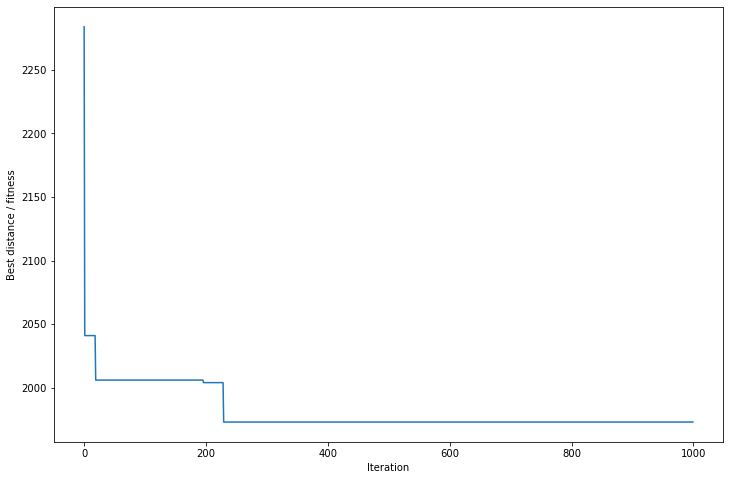

In [165]:


def rolette_wheel(p):
  

    cumsum = np.cumsum(p)

    r = random.random()

    next_node = np.where(r <= cumsum)

    next_node = next_node[0][0]

    return next_node


def create_colony(l, ant_no, tau, eta, alpha, beta):
    n = len(l)

    colony = []

    for i in range(ant_no):
        ans = []
        initial_node = random.randint(0, n - 1)  # select a random node

        ans.append(initial_node)

        P_allNodes = tau ** alpha * eta ** beta

        for j in range(1, n):  # choose the rest of nodes

            p = P_allNodes[initial_node][:]

            p[ans[-1]] = 0

            P = p / np.sum(p)

            next_node = rolette_wheel(P)
            ans.append(next_node)

        ans.append(ans[0])

        colony.append(ans)

    return colony


def fitness(tour, l):
    fitness = 0

    for i in range(len(tour) - 1):
        current_node = tour[i]
        next_node = tour[i + 1]

        fitness = fitness + l[current_node][next_node]

    return fitness


def update_phromone(tau, colony, antno):

    for i in range(antno):
        for j in range(len(colony[0]) - 1):
            current_node = colony[i][j]
            next_node = colony[i][j + 1]

            tau[current_node][next_node] = tau[current_node][next_node] + 1 / fitness(colony[i], l)
            tau[next_node][current_node] = tau[next_node][current_node] + 1 / fitness(colony[i], l)

    return tau



def aco_algo_tsp(l, max_iter, alpha, beta, rho):
    
    max_iter = max_iter
    ant_no = 10
    n = len(l)
    
    all_best_tour=[]
    
    tau0 = 10 * 1 / (len(l) * np.mean(l))  # initial phromone

    tau = tau0 * np.ones((n, n))  # phromone matx

    eta = l  # desirability of each edge

    rho = rho  # evporation rate
    alpha = alpha  # phromone exponential parameters
    beta = beta  # desirability exponential parameter

    best_fitness = np.inf
    
    all_shortest_path=[]

    
    # main loop for ACO
    for i in range(max_iter):

        all_fitness = []

        colony = create_colony(l, ant_no, tau, eta, alpha, beta)

        # print(colony)

        for j in range(ant_no):
            all_fitness.append(fitness(colony[j], l))


        min_tour = colony[np.argmin(all_fitness)]
        
        min_fitness = all_fitness[np.argmin(all_fitness)]
        
        if min_fitness < best_fitness:
            all_best_tour=[]
        
        if min_fitness <= best_fitness:
            best_fitness = min_fitness
            best_tour = colony[np.argmin(all_fitness)]
            best_tour = np.array(best_tour)+1
            
            
        if list(best_tour) not in all_best_tour:
            all_best_tour.append(list(best_tour))
        

        tau = update_phromone(tau, colony, ant_no)

        tau = (1 - rho) * tau

        print(f'Iteration = {i + 1}, shortest_path distance = {best_fitness} , best_tour = {best_tour}')
        all_shortest_path.append(best_fitness)
        
    print(f'\nShortest Path distance = {best_fitness}')
    
    print("All best tour = ",*all_best_tour)
    
    
    plt.figure(figsize=(12,8))
    plt.plot(range(max_iter),all_shortest_path)
    plt.xlabel("Iteration")
    plt.ylabel("Best distance / fitness")
    
    return all_shortest_path
    

start=time()
aco_algo_tsp(l,1000,1,1,0.05)  # aco_algo(graph, mat_iter, alpha, beta, rho)
end=time()
print("\nTotal Time taken = ",end-start)